In [34]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
ori_image=cv2.imread('/home/dipayan/Anupam/dataset/7.1.e_optha_EX/training/images/C0003166.jpg',cv2.COLOR_BGR2RGB)
ori_mask=cv2.imread("/home/dipayan/Anupam/dataset/7.1.e_optha_EX/training/ground_truth/Hard Exudates/C0003166_EX.png",cv2.IMREAD_UNCHANGED)
#ori_image=cv2.imread('/home/dipayan/Anupam/dataset/2.DRIVE/training/images/22_training.tif',cv2.IMREAD_UNCHANGED)
#ori_mask = Image.open('/home/dipayan/Anupam/dataset/2.DRIVE/training/ground_truth/RV/22_manual1.gif')
#ori_mask = np.array(ori_mask)
np.shape(ori_mask)


(1696, 2544)

In [35]:
ori_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
np.unique(ori_mask)

array([  0, 255], dtype=uint8)

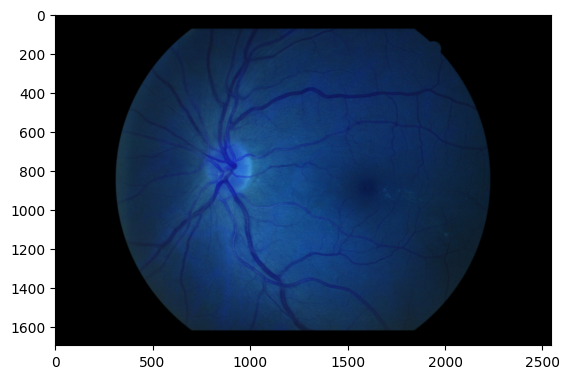

In [37]:
plt.imshow(ori_image)

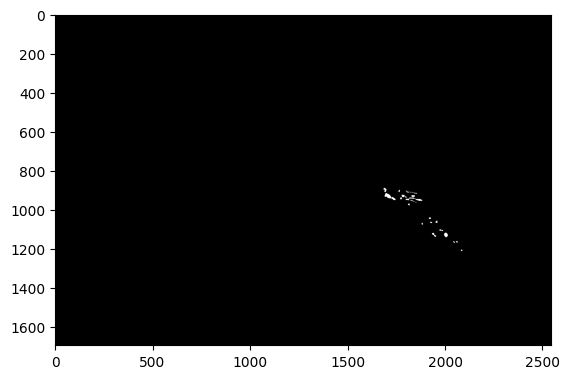

In [38]:
plt.imshow(ori_mask,cmap="Greys_r")

In [39]:
ori_mask[ori_mask>1]=1
ori_mask[ori_mask<1]=0

In [40]:
np.unique(ori_mask)

array([0, 1], dtype=uint8)

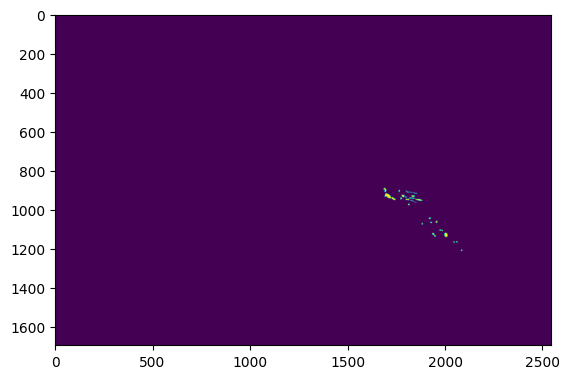

In [41]:
plt.imshow(ori_mask)

In [42]:
size = ori_image.shape
max(size)

2544

(2048, 2048)

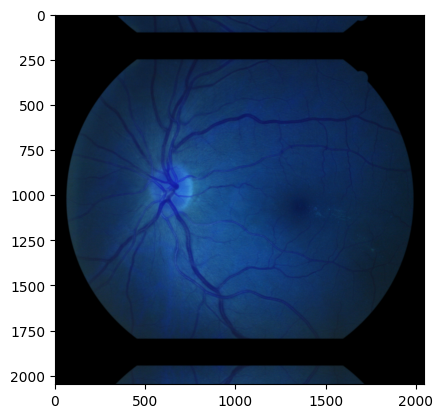

In [43]:
img_size = max(size)
import albumentations as A
#aug = A.PadIfNeeded(min_height=3504, min_width=3504, p=1)
#aug = A.PadIfNeeded(min_height=512, min_width=512, p=1)
#aug = A.CenterCrop(p=1, height=560, width=560)
aug = A.Compose([
        #A.LongestMaxSize(img_size),
        A.PadIfNeeded(min_height=img_size, min_width=img_size, p=1),
        #A.PadIfNeeded(min_height=512, min_width=512, p=1),
        #A.Crop(x_min=250, x_max=x_max, y_min=y_min, y_max=y_max, p=1),
        A.CenterCrop(p=1, height=2048, width=2048),
        #A.Resize(height = 1024, width = 1024, always_apply =True)
])
augmented = aug(image = ori_image, mask=ori_mask)
image_padded = augmented['image']
mask_padded = augmented['mask']
plt.imshow(image_padded)
mask_padded.shape

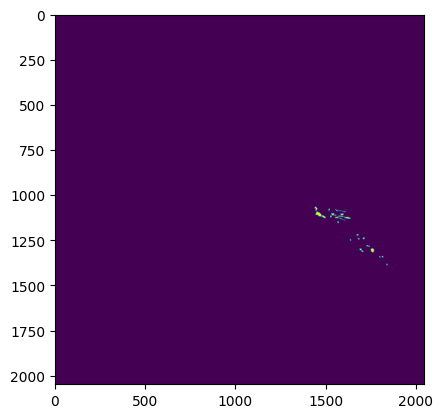

In [44]:
plt.imshow(mask_padded)

In [16]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [17]:
mask_padded = Image.fromarray(np.uint8(mask_padded))
import torchvision.transforms as T
# resized_imgs = [T.Resize(size=size)(mask_padded) for size in (300, 500, 1000, mask_padded.size)]
# plot(resized_imgs)